### Multi-Armed Bandit Problem's Applications to Crytocurrency Portfolio Selection

In the multi-armed bandit problem, we often encounter the exploration vs exploitation dilemma. When we have a lot of slot machines in a casino configured with an unknown win probability, we need to come up with an optimal strategy so that we can maximize the value generated from those slot machines. At the same time, we also want to minimize the potential regret for not making the optimal choices. 

The notebook will first introduce the exploration vs explotation dilemma where we have crypto tokens with different rewards. We will perform simulations to determine which arm has the highest return in each simulation. In each bandit approach, we will be balancing between exploitation and exploration to maximize our cumulative return and minimize the regret. For each simulation, we invested $1 per day on a single token and determine how much return it can generated with that single token using different bandit algorithms.

### Preprocessing

In [920]:
from functools import reduce
import pandas as pd

neo = pd.read_csv('data/neo_price.csv')[['Date', 'Open', 'Close']][:500]
neo.columns = ['date', 'neo_open', 'neo_close']
eth = pd.read_csv('data/ethereum_price.csv')[['Date', 'Open', 'Close']][:500]
eth.columns = ['date', 'eth_open', 'eth_close']
dash = pd.read_csv('data/dash_price.csv')[['Date', 'Open', 'Close']][:500]
dash.columns = ['date', 'dash_open', 'dash_close']
xmr = pd.read_csv('data/monero_price.csv')[['Date', 'Open', 'Close']][:500]
xmr.columns = ['date', 'xmr_open', 'xmr_close']
ltc = pd.read_csv('data/litecoin_price.csv')[['Date', 'Open', 'Close']][:500]
ltc.columns = ['date', 'ltc_open', 'ltc_close']

data_frames = [neo, eth, dash, xmr, ltc]
crypto = reduce(lambda left, right: pd.merge(left, right, on=['date'],
                                             how='inner'), 
                data_frames)[::-1].reset_index().drop(columns=['index'])
crypto['date'] = pd.to_datetime(crypto['date'])
crypto = crypto.set_index('date')
crypto.to_csv('data/crypto.csv')

In [921]:
crypto_data = crypto.reset_index()
for token in ['neo', 'eth', 'dash', 'xmr', 'ltc']:
    crypto_data[token+'_ret'] = (1/crypto_data[token+'_open'])*crypto_data[token+'_close'] - 1
    crypto_data[token+'_ret_cumsum'] = crypto_data[token+'_ret'].cumsum()
    crypto_data[token+'_mean'] = crypto_data[token+'_ret'].expanding().mean()
crypto_data.head()

,date,neo_open,neo_close,eth_open,eth_close,dash_open,dash_close,xmr_open,xmr_close,ltc_open,...,eth_mean,dash_ret,dash_ret_cumsum,dash_mean,xmr_ret,xmr_ret_cumsum,xmr_mean,ltc_ret,ltc_ret_cumsum,ltc_mean
0,2016-10-09,0.205045,0.186541,12.22,12.05,11.73,11.59,6.90,7.48,3.84,...,-0.013912,-0.011935,-0.011935,-0.011935,0.084058,0.084058,0.084058,-0.005208,-0.005208,-0.005208
1,2016-10-10,0.186466,0.193108,12.06,11.76,11.59,11.69,7.56,6.94,3.82,...,-0.019394,0.008628,-0.003307,-0.001654,-0.082011,0.002047,0.001024,-0.005236,-0.010444,-0.005222
2,2016-10-11,0.193114,0.193575,11.76,11.79,11.69,11.73,6.92,7.28,3.80,...,-0.012079,0.003422,0.000115,0.000038,0.052023,0.054071,0.018024,0.005263,-0.005181,-0.001727
3,2016-10-12,0.193611,0.186052,11.78,11.93,11.74,11.43,7.28,7.31,3.82,...,-0.005876,-0.026405,-0.026291,-0.006573,0.004121,0.058191,0.014548,-0.015707,-0.020888,-0.005222
4,2016-10-13,0.186072,0.185407,11.91,11.96,11.43,11.44,7.28,6.91,3.75,...,-0.003861,0.000875,-0.025416,-0.005083,-0.050824,0.007367,0.001473,0.042667,0.021779,0.004356


In [862]:
tokens=['neo', 'eth', 'dash', 'xmr', 'ltc']

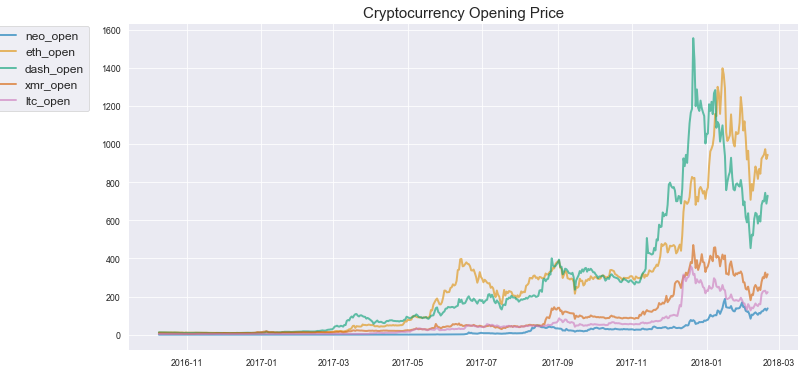

In [687]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,6))
sns.despine(left=False)
sns.set_context(font_scale=1.5, rc={"lines.linewidth": 2})
sns.set_style("darkgrid", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_palette('colorblind')
ax = sns.lineplot(data=crypto_data, x='date', y='neo_open', alpha=0.6)
sns.lineplot(data=crypto_data, x='date', y='eth_open', alpha=0.6)
sns.lineplot(data=crypto_data, x='date', y='dash_open', alpha=0.6)
sns.lineplot(data=crypto_data, x='date', y='xmr_open', alpha=0.6)
sns.lineplot(data=crypto_data, x='date', y='ltc_open', alpha=0.6)
ax.set_ylabel('')    
ax.set_xlabel('')
plt.title('Cryptocurrency Opening Price', size=15)
fig.legend(labels=['neo_open', 'eth_open', 'dash_open', 'xmr_open', 'ltc_open'], 
           bbox_to_anchor=(0.11, 0.82), fontsize='12')
plt.show()

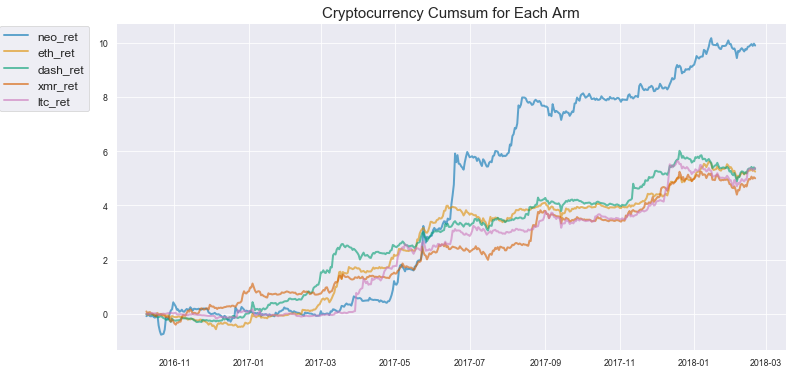

In [693]:
fig=plt.figure(figsize=(12,6))
sns.despine(left=False)
sns.set_context(font_scale=1.5, rc={"lines.linewidth": 2})
sns.set_style("darkgrid", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_palette('colorblind')
ax = sns.lineplot(data=crypto_data, x='date', y='neo_ret_cumsum', alpha=0.6)
sns.lineplot(data=crypto_data, x='date', y='eth_ret_cumsum', alpha=0.6)
sns.lineplot(data=crypto_data, x='date', y='dash_ret_cumsum', alpha=0.6)
sns.lineplot(data=crypto_data, x='date', y='xmr_ret_cumsum', alpha=0.6)
sns.lineplot(data=crypto_data, x='date', y='ltc_ret_cumsum', alpha=0.6)
ax.set_ylabel('')    
ax.set_xlabel('')
plt.title('Cryptocurrency Cumsum for Each Arm', size=15)
fig.legend(labels=['neo_ret', 'eth_ret', 'dash_ret', 'xmr_ret', 'ltc_ret'], 
           bbox_to_anchor=(0.11, 0.82), fontsize='12')
plt.show()

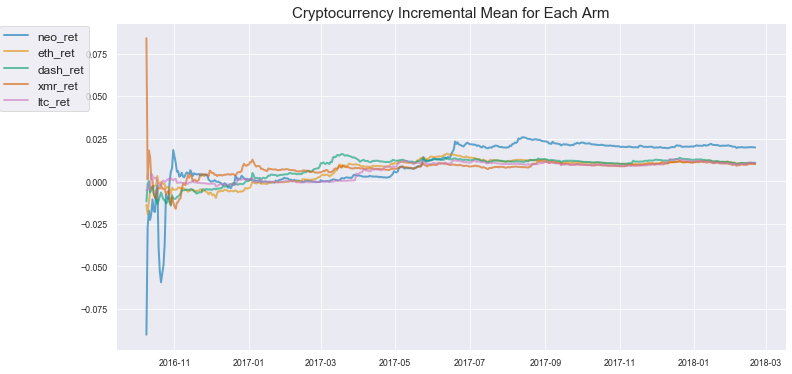

In [923]:
fig=plt.figure(figsize=(12,6))
sns.despine(left=False)
sns.set_context(font_scale=1.5, rc={"lines.linewidth": 2})
sns.set_style("darkgrid", {"xtick.major.size": 8, "ytick.major.size": 8})
sns.set_palette('colorblind')
ax = sns.lineplot(data=crypto_data, x='date', y='neo_mean', alpha=0.6)
sns.lineplot(data=crypto_data, x='date', y='eth_mean', alpha=0.6)
sns.lineplot(data=crypto_data, x='date', y='dash_mean', alpha=0.6)
sns.lineplot(data=crypto_data, x='date', y='xmr_mean', alpha=0.6)
sns.lineplot(data=crypto_data, x='date', y='ltc_mean', alpha=0.6)
ax.set_ylabel('')    
ax.set_xlabel('')
plt.title('Cryptocurrency Incremental Mean for Each Arm', size=15)
fig.legend(labels=['neo_ret', 'eth_ret', 'dash_ret', 'xmr_ret', 'ltc_ret'], 
           bbox_to_anchor=(0.11, 0.82), fontsize='12')
plt.show()

In [933]:
incremental_mean = []
for t in tokens:
    incremental_mean.append(crypto_data[t + '_mean'][499])
print('%s has the highest average reward' %tokens[np.argmax(incremental_mean)])

neo has the highest average reward


In [498]:
def pairs(L, typeCons):
    return [(typeCons(L[i]), typeCons(L[i+1])) for i in range(0, len(L) - 1, 2)]

def process_line(stockLine):
    tokens = stockLine.split(',')
    return [tokens[0]] + pairs(tokens[1:], float)

def transpose(A):
    def column(A, j): return [row[j] for row in A]
    return [column(A, j) for j in range(len(A[0]))]

In [499]:
def preprocess_table(filename):
    with open(filename, 'r') as infile:
        lines = infile.readlines()
        
    headers = lines[0].strip().split(',')
    numericalTable = [[headers[0]] + pairs(headers[1:], str)] + [process_line(line) for line in lines[1:]]
    preDictTable = transpose(numericalTable)[1:]
    
    # convert to a dictionary {str: [(float, float)]}
    stockHistoryDict = {}
    for singleStockHistory in preDictTable:
        ticker = singleStockHistory[0][0].split('_')[0]
        stockHistoryDict[ticker] = singleStockHistory[1:]
    
    return stockHistoryDict

In [500]:
crypto_table = preprocess_table('data/crypto.csv')

### EpsilonGreedy

In [1112]:
def daily_crypto_return(crypto_table, t, token, invested_capital=1.0):

    open_price, close_price = crypto_table[token][t]
    units_invested = invested_capital / open_price
    amount_sold = units_invested * close_price

    return amount_sold - invested_capital

In [1113]:
class EpsilonGreedy():
    """
    Implementation of epsilon greedy bandit algorithm
    
    parameters:
        epsilon: a proportion at which the arm is selected for using exploitation or exploration
        counts: store the number of pulls for each arm
        values: store the reward values for each arm
    
    methods:
        initialize: set up arrays that record the number of pulls and reward values for each arm 
        select arm: determine whether to exploit or explore based on the predetermined epsilon
        update: update the reward value for each arm
    """
    def __init__(self, epsilon, counts, values):
        self.epsilon = epsilon # probability of explore
        self.counts = counts # number of pulls for each arms
        self.values = values # average amount of reward we've gotten from each arms
        return

    def initialize(self, n_arms):
        self.counts = np.zeros(n_arms, dtype=int)
        self.values = np.zeros(n_arms, dtype=float)
        return

    def select_arm(self):
        if random.random() > self.epsilon:
            return np.argmax(self.values)
        else:
            return random.randrange(len(self.values))

    def update(self, chosen_arm, reward):
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]

        value = self.values[chosen_arm]
        new_value = ((n - 1) / n) * value + (1 / n) * reward # weighted average of the previously estimated value and the reward we just received
        self.values[chosen_arm] = new_value

In [1114]:
def test_algorithm(algo, n_arms, crypto_table, time_steps):
    
    times = []
    chosen_arms = [0.0 for i in range(time_steps)]
    rewards = [0.0 for i in range(time_steps)]
    cumulative_rewards = [0.0 for i in range(time_steps)]
    
    tokens = list(crypto_table.keys())
    shuffle(tokens)
    def daily_return(choice, t): return daily_crypto_return(crypto_table, t, tokens[choice])

    algo.initialize(n_arms)
    for t in range(time_steps): 
        times.append(t)
        chosen_arms[t] = algo.select_arm() # record the chosen arm at each timestep
        reward = daily_return(chosen_arms[t], t) # record the reward at each timestep 
        rewards[t] = reward
        if t == 0:
            cumulative_rewards[t] = reward
        else:
            cumulative_rewards[t] = cumulative_rewards[t - 1] + daily_return(chosen_arms[t], t)
        algo.update(chosen_arms[t], reward)

    return [times, chosen_arms, rewards, cumulative_rewards]

In [1115]:
n_arms = len(crypto_table.keys())
algo_egreedy = EpsilonGreedy(0.05, [], [])
results_egreedy = test_algorithm(algo_egreedy, n_arms, crypto_table, 500) # rewards passed in is a function

In [1116]:
df_egreedy = pd.DataFrame(zip(*results_egreedy), columns=['date', 'chosen arm', 'reward', 'cumulative reward'])

for ind in range(n_arms):
    df_egreedy.loc[df_egreedy['chosen arm'] == ind, 'arm_' + str(ind)] = df_egreedy['reward']
    df_egreedy.loc[df_egreedy['chosen arm'] != ind, 'arm_' + str(ind)] = 0
    df_egreedy['arm_' + str(ind) + '_cumsum'] =  df_egreedy['arm_' + str(ind)].cumsum()
    df_egreedy['arm_' + str(ind) + '_incremental_mean'] =  df_egreedy['arm_' + str(ind)].replace(0, np.NaN).expanding().mean()

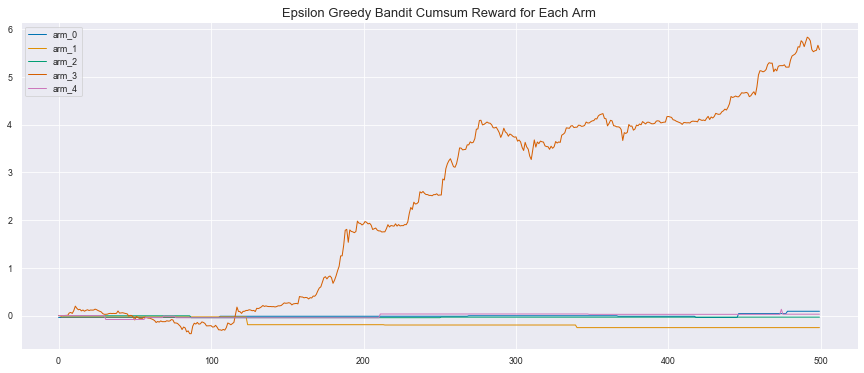

In [1117]:
plt.figure(figsize=(15, 6))
   
for arm in range(n_arms):
   
    x = df_egreedy['date']
    y = df_egreedy['arm_' + str(arm) + '_cumsum']

    plt.plot(x, y, linewidth=1, label='arm_{}'.format(arm))
    plt.legend()
    plt.title('Epsilon Greedy Bandit Cumsum Reward for Each Arm', size=13)

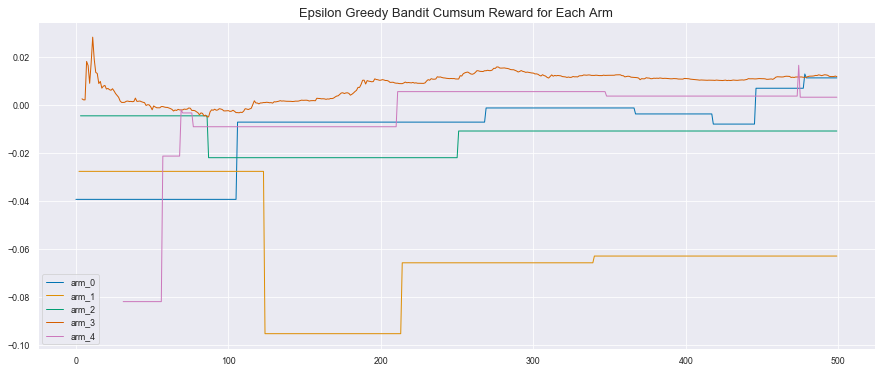

In [1118]:
plt.figure(figsize=(15, 6))
   
for arm in range(n_arms):
   
    x = df_egreedy['date']
    y = df_egreedy['arm_' + str(arm) + '_incremental_mean']

    plt.plot(x, y, linewidth=1, label='arm_{}'.format(arm))
    plt.legend()
    plt.title('Epsilon Greedy Bandit Cumsum Reward for Each Arm', size=13)

In [1119]:
print('According to Epsilon Greedy algorithm, %s has the highest average reward' %tokens[np.argmax(algo_egreedy.values)])

According to Epsilon Greedy algorithm, xmr has the highest average reward


### Softmax

In [1127]:
def categorical_draw(probs):
    z = random.random()
    cum_prob = 0.0
    
    for i in range(len(probs)):
        prob = probs[i]
        cum_prob += prob    
        if cum_prob > z:
            return i
        
    return len(probs) - 1

def draw(probs):
    choice = random.uniform(0, sum(probs))
    
    for ind, weight in enumerate(probs):
        choice -= weight
        if choice <= 0:
            return ind
    
class Softmax():
    """
    Implementation of epsilon softmax bandit algorithm
    
    parameters:
        tau: the hyperparameter that determines the extent of randomization
        counts: store the number of pulls for each arm
        values: store the reward values for each arm
    
    methods:
        initialize: set up arrays that record the number of pulls and reward values for each arm 
        select arm: calculate the softmax probability for each arm and determine which arm to draw
        update: update the reward value for each arm
    """
    def __init__(self, tau, counts, values):
        self.tau = tau
        self.counts = counts 
        self.values = values 
    
    # Initialise k number of arms
    def initialize(self, n_arms):
        self.counts = np.zeros(n_arms, dtype=int)
        self.values = np.zeros(n_arms, dtype=float)
        return
    
    def select_arm(self):

        z = sum([math.exp(v / self.tau) for v in self.values])
        probs = [math.exp(v / self.tau) / z for v in self.values]
        
        # Use categorical_draw to pick arm
        return categorical_draw(probs)
    
    # Choose to update chosen arm and reward
    def update(self, chosen_arm, reward):
        
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        n = self.counts[chosen_arm]
        
        value = self.values[chosen_arm]
        new_value = ((n - 1) / n) * value + (1 / n) * reward 
        self.values[chosen_arm] = new_value

In [1128]:
def test_algorithm(algo, n_arms,  crypto_table, time_steps):
    
    times = []
    # Initialise variables for duration of accumulated simulation (num_sims * horizon_per_simulation)
    chosen_arms = [0.0 for i in range(time_steps)]
    rewards = [0.0 for i in range(time_steps)]
    cumulative_rewards = [0 for i in range(time_steps)]
    
    tokens = list(crypto_table.keys())
    shuffle(tokens)
    def daily_return(choice, t): return daily_crypto_return(crypto_table, t, tokens[choice])
    
    algo.initialize(n_arms)
    for t in range(time_steps):
        times.append(t)
        chosen_arms[t] = algo.select_arm() # record the chosen arm at each timestep
        reward = daily_return(chosen_arms[t], t) # record the reward at each timestep 
        rewards[t] = reward
        if t ==0:
            cumulative_rewards[t] = reward
        else:
            cumulative_rewards[t] = cumulative_rewards[t-1] + reward
        algo.update(chosen_arms[t], reward)
    
    return [times, chosen_arms, rewards, cumulative_rewards]

In [1129]:
n_arms = len(crypto_table.keys())
algo_softmax = Softmax(0.05, [], [])
results_softmax = test_algorithm(algo_softmax, n_arms, crypto_table, 500)

In [1130]:
df_softmax = pd.DataFrame(zip(*results_softmax), columns=['date', 'chosen arm', 'reward', 'cumulative reward'])

for ind in range(n_arms):
    df_softmax.loc[df_softmax['chosen arm'] == ind, 'arm_' + str(ind)] = df_softmax['reward']
    df_softmax.loc[df_softmax['chosen arm'] != ind, 'arm_' + str(ind)] = 0
    df_softmax['arm_' + str(ind) + '_cumsum'] =  df_softmax['arm_' + str(ind)].cumsum()
    df_softmax['arm_' + str(ind) + '_incremental_mean'] = df_softmax['arm_' + str(ind)].replace(0, np.NaN).expanding().mean()

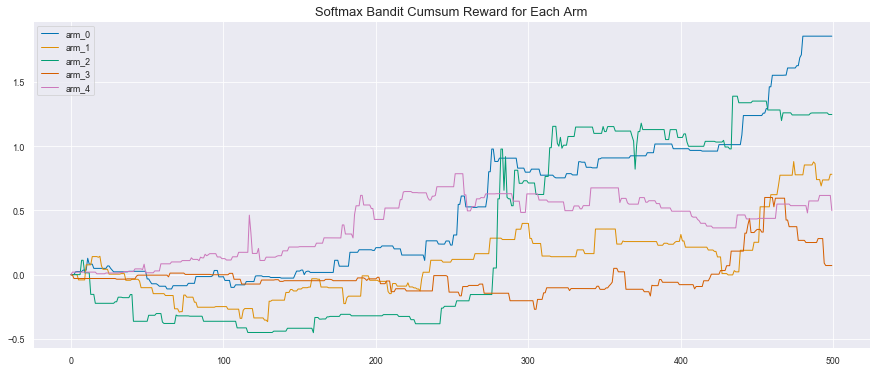

In [1131]:
plt.figure(figsize=(15, 6))
   
for arm in range(n_arms):
   
    x = df_softmax['date']
    y = df_softmax['arm_' + str(arm) + '_cumsum']

    plt.plot(x, y, linewidth=1, label='arm_{}'.format(arm))
    plt.legend()
    plt.title('Softmax Bandit Cumsum Reward for Each Arm', size=13)

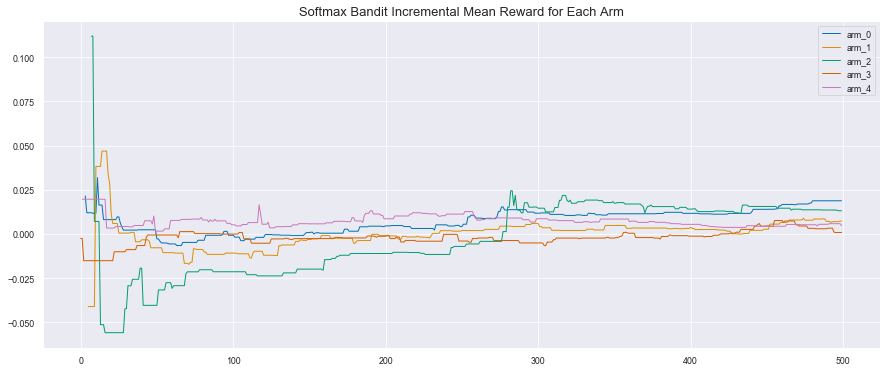

In [1132]:
plt.figure(figsize=(15, 6))
   
for arm in range(n_arms):
   
    x = df_softmax['date']
    y = df_softmax['arm_' + str(arm) + '_incremental_mean']

    plt.plot(x, y, linewidth=1, label='arm_{}'.format(arm))
    plt.legend()
    plt.title('Softmax Bandit Incremental Mean Reward for Each Arm', size=13)

In [1133]:
print('According to Softmax algorithm, %s has the highest average reward' %tokens[np.argmax(algo_softmax.values)])

According to Softmax algorithm, neo has the highest average reward


### Upper Confidence Bound

In [1089]:
class UpperConfidenceBound():
    """
    Implementation of epsilon upper confidence bound bandit algorithm
    
    parameters:
        counts: store the number of pulls for each arm
        values: store the reward values for each arm
    
    methods:
        initialize: set up arrays that record the number of pulls and reward values for each arm 
        select arm: calculate the upper confidence bound for each arm and determine which arm to draw
        update: update the reward value for each arm
    """
    def __init__(self, counts, values):
        self.counts = counts 
        self.values = values 
    
    def initialize(self, n_arms):
        self.counts = np.zeros(n_arms, dtype=int)
        self.values = np.zeros(n_arms, dtype=float)

    def select_arm(self, n_arms):
        for arm in range(n_arms):
            if self.counts[arm] == 0:
                return arm
            
        ucb = self.values + np.sqrt((2 * np.log(sum(self.counts))) / self.counts)
        return np.argmax(ucb)
    
    def update(self, chosen_arm, reward):
        
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        value = self.values[chosen_arm]
        n = self.counts[chosen_arm]
        new_value = ((n - 1) / n) * value + (1 / n) * reward 
        self.values[chosen_arm] = new_value

In [1090]:
def test_algorithm(algo, n_arms, crypto_table, time_steps):
    times = []
    # Initialise variables for duration of accumulated simulation (num_sims * horizon_per_simulation)
    chosen_arms = [0.0 for i in range(time_steps)]
    rewards = [0.0 for i in range(time_steps)]
    cumulative_rewards = [0 for i in range(time_steps)]
    
    tokens = list(crypto_table.keys())
    shuffle(tokens)
    def daily_return(choice, t): return daily_crypto_return(crypto_table, t, tokens[choice])
    
    algo.initialize(n_arms)
    for t in range(time_steps):
        times.append(t)
        chosen_arms[t] = algo.select_arm(n_arms) # record the chosen arm at each timestep
        reward = daily_return(chosen_arms[t], t) # record the reward at each timestep 
        rewards[t] = reward
        if t == 0:
            cumulative_rewards[t] = reward
        else:
            cumulative_rewards[t] = cumulative_rewards[t-1] + reward
        algo.update(chosen_arms[t], reward)
    
    return [times, chosen_arms, rewards, cumulative_rewards]

In [1091]:
n_arms = len(crypto_table.keys())
algo_ucb = UpperConfidenceBound([], [])
results_ucb = test_algorithm(algo_ucb, n_arms, crypto_table, 500)

In [1092]:
df_ucb = pd.DataFrame(zip(*results_ucb), columns=['date', 'chosen arm', 'reward', 'cumulative reward'])

for ind in range(n_arms):
    df_ucb.loc[df_ucb['chosen arm'] == ind, 'arm_' + str(ind)] = df_ucb['reward']
    df_ucb.loc[df_ucb['chosen arm'] != ind, 'arm_' + str(ind)] = 0
    df_ucb['arm_' + str(ind) + '_cumsum'] =  df_ucb['arm_' + str(ind)].cumsum()
    df_ucb['arm_' + str(ind) + '_incremental_mean'] = df_ucb['arm_' + str(ind)].replace(0, np.NaN).expanding().mean()

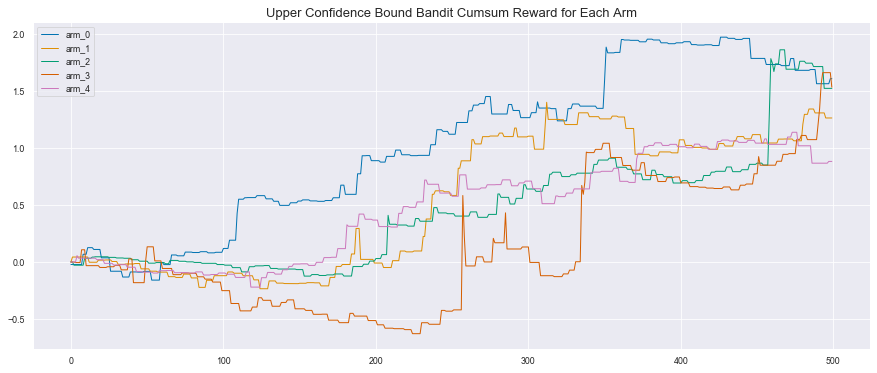

In [1093]:
plt.figure(figsize=(15, 6))
   
for arm in range(n_arms):
   
    x = df_ucb['date']
    y = df_ucb['arm_' + str(arm) + '_cumsum']

    plt.plot(x, y, linewidth=1, label='arm_{}'.format(arm))
    plt.legend()
    plt.title('Upper Confidence Bound Bandit Cumsum Reward for Each Arm', size=13)

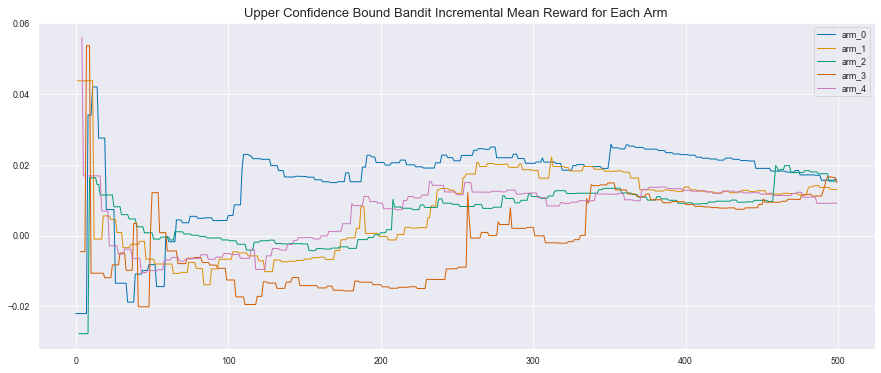

In [1094]:
plt.figure(figsize=(15, 6))
   
for arm in range(n_arms):
   
    x = df_ucb['date']
    y = df_ucb['arm_' + str(arm) + '_incremental_mean']

    plt.plot(x, y, linewidth=1, label='arm_{}'.format(arm))
    plt.legend()
    plt.title('Upper Confidence Bound Bandit Incremental Mean Reward for Each Arm', size=13)

In [1095]:
print('According to Upper Confidence Bound algorithm, %s has the highest average reward' %tokens[np.argmax(algo_ucb.values)])

According to Upper Confidence Bound algorithm, neo has the highest average reward


### Thompson Sampling

In [1104]:
from scipy.stats import beta 

In [1105]:
class ThompsonSampling():
    """
    Implementation of thompson sampling algorithm
    
    parameters:
        epsilon: the epsilon for determining the probability of exploration
        counts: store the number of pulls for each arm
        values: store the reward values for each arm
    
    methods:
        initialize: set up arrays that record the number of pulls and reward values for each arm 
        select arm: calculate the beta distribution for each arm and determine which arm to draw
        update: update the alpha, beta, and reward value for each arm
    """
    def __init__(self, n_arms, alpha, beta, counts, values):
        self.alpha = np.ones(n_arms, dtype=float)
        self.beta = np.ones(n_arms, dtype=float)
        self.counts = counts 
        self.values = values 
    
    def initialize(self, n_arms):
        self.counts = np.zeros(n_arms, dtype=int)
        self.values = np.zeros(n_arms, dtype=float)

    def select_arm(self, n_arms):
        probs = [beta(self.alpha[i], self.beta[i]).rvs(size=1) for i in range(n_arms)]
        return np.argmax(probs)
    
    def update(self, chosen_arm, reward):
     
        self.counts[chosen_arm] = self.counts[chosen_arm] + 1
        self.alpha[chosen_arm] = self.alpha[chosen_arm] + reward
        self.beta[chosen_arm] = self.beta[chosen_arm] + 1 - reward
   
        
        n = self.counts[chosen_arm]
        value = self.values[chosen_arm]
        new_value = ((n - 1) / n) * value + (1 / n) * reward
        self.values[chosen_arm] = new_value 

In [1106]:
def test_algorithm(algo, n_arms, crypto_table, time_steps):
    times = []
    # Initialise variables for duration of accumulated simulation (num_sims * horizon_per_simulation)
    chosen_arms = [0.0 for i in range(time_steps)]
    rewards = [0.0 for i in range(time_steps)]
    cumulative_rewards = [0 for i in range(time_steps)]
    
    tokens = list(crypto_table.keys())
    shuffle(tokens)
    def daily_return(choice, t): return daily_crypto_return(crypto_table, t, tokens[choice])
    
    algo.initialize(n_arms)
    for t in range(time_steps): 
        times.append(t)
        chosen_arms[t] = algo.select_arm(n_arms)
        reward = daily_return(chosen_arms[t], t)
        rewards[t] = reward    
        if t == 0:
            cumulative_rewards[t] = reward
        else:
            cumulative_rewards[t] = cumulative_rewards[t-1] + reward
        algo.update(chosen_arms[t], reward)
        
    return [times, chosen_arms, rewards, cumulative_rewards]

In [1107]:
n_arms = len(crypto_table.keys())
algo_ts = ThompsonSampling(n_arms, [], [], [], [])
results_ts = test_algorithm(algo_ts, n_arms, crypto_table, 500)

In [1108]:
df_ts = pd.DataFrame(zip(*results_ts), columns=['date', 'chosen arm', 'reward', 'cumulative reward'])

for ind in range(n_arms):
    df_ts.loc[df_ts['chosen arm'] == ind, 'arm_' + str(ind)] = df_ts['reward']
    df_ts.loc[df_ts['chosen arm'] != ind, 'arm_' + str(ind)] = 0
    df_ts['arm_' + str(ind) + '_cumsum'] =  df_ts['arm_' + str(ind)].cumsum()
    df_ts['arm_' + str(ind) + '_incremental_mean'] = df_ts['arm_' + str(ind)].replace(0, np.NaN).expanding().mean()

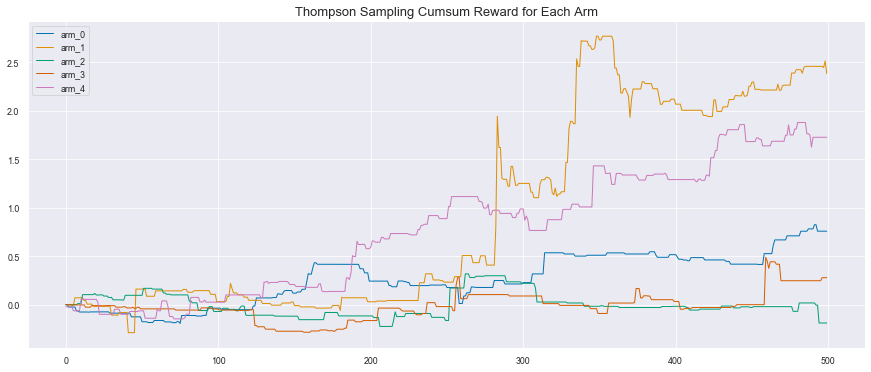

In [1109]:
plt.figure(figsize=(15, 6))
   
for arm in range(n_arms):
   
    x = df_ts['date']
    y = df_ts['arm_' + str(arm) + '_cumsum']

    plt.plot(x, y, linewidth=1, label='arm_{}'.format(arm))
    plt.legend()
    plt.title('Thompson Sampling Cumsum Reward for Each Arm', size=13)

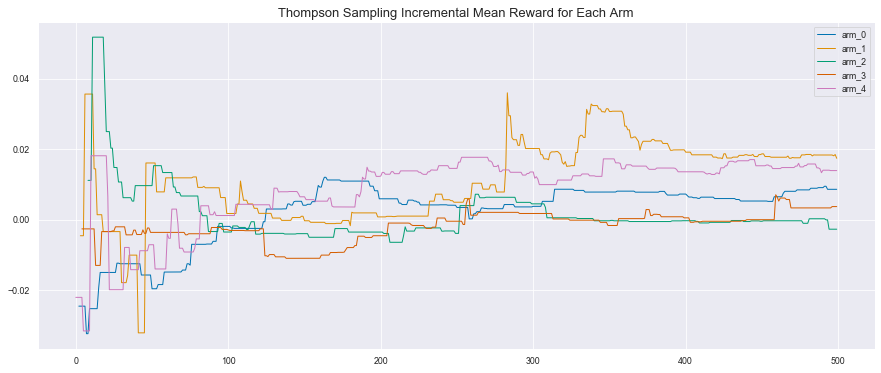

In [1110]:
plt.figure(figsize=(15, 6))
   
for arm in range(n_arms):
   
    x = df_ts['date']
    y = df_ts['arm_' + str(arm) + '_incremental_mean']

    plt.plot(x, y, linewidth=1, label='arm_{}'.format(arm))
    plt.legend()
    plt.title('Thompson Sampling Incremental Mean Reward for Each Arm', size=13)

In [1111]:
print('According to Thompson Sampling algorithm, %s has the highest average reward' %tokens[np.argmax(algo_ts.values)])

According to Thompson Sampling algorithm, eth has the highest average reward


### Conclusion

In [1027]:
numActions = 5
numRounds = 500
stockTable = crypto_table

reward = lambda choice, t: daily_crypto_return(stockTable, t, tokens[choice])
singleActionReward = lambda j: sum([reward(j,t) for t in range(numRounds)])

bestAction = max(range(numActions), key=singleActionReward)
bestActionCumulativeReward = singleActionReward(bestAction)

In [1029]:
bestActionCumulativeReward

11.290089901625507

In [1136]:
results_ts[3][-1]

4.958014173402527

In [1137]:
results_softmax[3][-1]

4.456342119348408

In [1138]:
results_egreedy[3][-1]

5.403051499278903

In [1139]:
results_ucb[3][-1]

6.8057526271751225

### Reference

***
https://jeremykun.com/2013/12/09/bandits-and-stocks/
***